In [159]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Updating/Instaling Libraries**

In [160]:
# !pip install keras
# !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu
# !pip install xlrd==1.2.0
# !pip install openpyxl

# **Importing Libraries**

In [161]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 


from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.python.keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.python.keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,MaxPooling2D, Conv1D, MaxPooling1D

from tensorflow.python.keras.models import Sequential

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional


from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

# **Loading Dataset**

In [162]:
df_train=pd.read_csv("/home/ubuntu/Desktop/ML/Coding/dataset/SentNoB Dataset/Train.csv",encoding='utf-8')
df_test=pd.read_csv("/home/ubuntu/Desktop/ML/Coding/dataset/SentNoB Dataset/Test.csv",encoding='utf-8')
df_val=pd.read_csv("/home/ubuntu/Desktop/ML/Coding/dataset/SentNoB Dataset/Test.csv",encoding='utf-8')
df_test=df_test.append(df_val)

In [163]:

df_train['count'] = df_train['Data'].str.split().str.len()
df_test['count'] = df_test['Data'].str.split().str.len()
display(df_train)
df_train.head()
df_train.describe()
df_train.info()
print(df_train.Label.unique())

#category,text,cleanText,count

,Data,Label,count
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1,22
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2,18
2,ভাই আপনার কথাই যাদু রয়েছে,1,5
3,উওরটা আমার অনেক ভাল লেগেছে,1,5
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0,14
...,...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,1,20
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,2,41
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,1,45
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,2,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    12575 non-null  object
 1   Label   12575 non-null  int64 
 2   count   12575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 294.9+ KB
[1 2 0]


In [164]:
# df_train_n=df_train[df_train.Label==0]
# df_train=df_train.append(df_train_n)

In [165]:
df_train

,Data,Label,count
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1,22
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2,18
2,ভাই আপনার কথাই যাদু রয়েছে,1,5
3,উওরটা আমার অনেক ভাল লেগেছে,1,5
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0,14
...,...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,1,20
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,2,41
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,1,45
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,2,10


In [166]:
display(df_test)
df_test.head()
df_test.describe()
df_test.info()

,Data,Label,count
0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...",0,14
1,ভাইয়া নতুন ভিডিও আসে না কেন,0,6
2,সৌরভ গাঙ্গুলী ছাড়া দাদাগিরি কখনো জমে উঠত না,0,8
3,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,2,20
4,আমিতো সেই ঝালপ্রিয়ো মানুষ,1,4
...,...,...,...
1581,ঐ পুলিশ কুওারবাচচাদের গুলিকরে মেরে ফেলা উচিত,2,7
1582,খিচুড়ি পর্ব মারাত্মক । বাকি টা দেখি তারপর কমেন্ট,1,9
1583,পাশের ফ্রেন্ডটা কি ছেলে না মেয়ে,2,6
1584,মদ লকমান না খেলেও আমরা খাই এমনটাই মনে হচ্ছে,2,9


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 0 to 1585
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    3172 non-null   object
 1   Label   3172 non-null   int64 
 2   count   3172 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 99.1+ KB


# **Stopwords Removal**

In [167]:
def stopwordRemoval(text):    
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]
    
    out=' '.join(stm)
    
    return str(out)

In [168]:
# data1 =pd.read_excel('/kaggle/input/bangla-stopwords/stopwords_bangla.xlsx')
# display(data1)
# stop = data1['words'].tolist()

In [169]:
#df_train['cleanText'] = df_train.cleanText.apply(lambda x: stopwordRemoval(str(x)))


In [170]:
#df_test['cleanText'] = df_test.cleanText.apply(lambda x: stopwordRemoval(str(x)))

# **Stemming**

In [171]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [172]:
#df_train['cleanText']=df_train['cleanText'].apply(stem_text)
#df_test['cleanText']=df_test['cleanText'].apply(stem_text)

# **Changing Labels to Numbers**

In [173]:
# #['economy' 'sports' 'international' 'state' 'technology' 'entertainment' 'education']

# df_train["category"].replace({"economy": "0", "sports": "1","international": "2","state": "3","technology": "4","entertainment": "5","education": "6"}, inplace=True)
# df_test["category"].replace({"economy": "0", "sports": "1","international": "2","state": "3","technology": "4","entertainment": "5","education": "6"}, inplace=True)
# display(df_train)
# display(df_test)

# **Removing Null values**

In [174]:
#display non-null values
df_train = df_train.dropna()
df_test = df_test.dropna()

# **Removing Small Texts**

In [175]:
#counting text length
df_train['count'] = df_train['Data'].str.split().str.len()
df_test['count'] = df_test['Data'].str.split().str.len()
# Remove the text with words less than 5
df_train= df_train.loc[df_train['count']>10]
df_test= df_test.loc[df_test['count']>10]

# **Shuffle Dataset**

In [176]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
display(df_train)
display(df_test)

,Data,Label,count
0,দোয়া করি ভাই তুই আরো সামনের দিকে এগিয়ে যাও অ...,1,13
1,"আল্লাহ্ তাআলার রহমতের বেঁচে গেলো দুইটি প্রাণ ,...",1,20
2,কমেন্ট বক্সে অনেকই আবেগে আপ্লুত আমাদের দেশে ক্...,2,12
3,360° এর অনুসন্ধানের মাধ্যমে তদন্ত করে ওনার টাক...,0,26
4,"এরকম হাজারো আওয়ামী লীগ কর্মী আছেন , দেশের আনাচ...",2,19
...,...,...,...
7422,তখন কি তিনি এমপি সাহেব দেশের সেবায় মনোযোগ দিবে...,2,16
7423,এটা এখন বাংলাদেশের প্রতিটা বিশ্ববিদ্যালয় গুলোত...,0,15
7424,সরকার ঘরে ঘরে বিদ্যুৎ সেবা পৌঁছে দিতে চাইছে যদ...,2,19
7425,আপনি যেন আমাদের মাঝে চিরজীবন বেঁচে থাকেন ; দোয়...,1,12


,Data,Label,count
0,"স্বাস্থ্যবান হতে চাই , আমি বয়সের তুলনায় অনেক ব...",0,14
3,ক্রিকেট কে বাচাতে হলে পাপকে অতিশিগ্রিই তাকেও গ...,2,20
5,টেকনিশিয়ান রা খাবার খাইয়ে আবার হজম করিয়ে দিবে ...,2,11
6,অন্য সব ইউনিভার্সিটিতে এর চেয়ে ভয়াবহ অবস্থা । ...,2,16
8,এই সব কিছু হবে কেন কেন এরকম অত্যাচার আমি মনে ক...,2,14
...,...,...,...
1574,"ও দাদা এতো খেলে তো ডায়াবেটিস হয়ে যাবে , একটু ক...",2,14
1577,অনান্য দেশ গুলোতে পুলিশ দেখলে আস্থালাভ হয় যে ব...,2,33
1578,আমার একটা প্রশ্ন এতো কম সময়ে এতো ওজন কমা এবং ব...,0,17
1580,সোনার মাসুদ রাণা । বিচারকের মারে চুদি । খানকির...,2,35


In [177]:
train_sentences=df_train['Data'].values
train_labels=df_train['Label'].values

In [178]:
test_sentences=df_test['Data'].values
test_labels=df_test['Label'].values

In [179]:
print("Training Set Length: "+str(len(df_train)))
print("Testing Set Length: "+str(len(df_test)))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 7427
Testing Set Length: 1904
train_labels shape: (7427,)
test_labels shape: (1904,)


# **Train/Test/Validation Set**
**This dataset contains two csv files. One is Train set and another is Test set.IN EDA,we have seen that train and test set is equal sized and distribution of class is identical to both of the test and train set.
I have used full train set for training and used 20% of the data from testset for validation set and 80% for testing
The validation set and the Test set is partitioned into stratified fashion to keep the distribution of class intact.**

In [180]:
from sklearn.model_selection import train_test_split
test_sentences, validation_sentences,test_labels, validation_labels = train_test_split(test_sentences, test_labels,stratify=test_labels,test_size=0.2)


# test_sentences=test_sentences[:1586]
# test_labels=test_labels[:1586]
# validation_sentences=test_sentences[1586:]
# validation_labels=test_labels[1586:]

In [181]:
train_labels=keras.utils.to_categorical(train_labels)
test_labels=keras.utils.to_categorical(test_labels)
validation_labels=keras.utils.to_categorical(validation_labels)


print("Training Set Length: "+str(len(df_train)))
print("Testing Set Length: "+str(len(df_test)))
print("training_sentences shape: "+str(train_sentences.shape))
print("testing_sentences shape: "+str(test_sentences.shape))
print("validation_sentences shape: "+str(validation_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))
print("validation_labels shape: "+str(validation_labels.shape))

Training Set Length: 7427
Testing Set Length: 1904
training_sentences shape: (7427,)
testing_sentences shape: (1523,)
validation_sentences shape: (381,)
train_labels shape: (7427, 3)
test_labels shape: (1523, 3)
validation_labels shape: (381, 3)


In [182]:
print(train_sentences[1])
print(train_labels[0])

আল্লাহ্ তাআলার রহমতের বেঁচে গেলো দুইটি প্রাণ , রাখে আল্লাহ্ মারে কে , হে আল্লাহ্ তুমি সবাইকে রক্ষা করুন আমিন 
[0. 1. 0.]


In [183]:
vocab_size = 100000
embedding_dim = 64
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"

# **Tokenization**

In [184]:
vocab_size = 100000
embedding_dim = 64
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"


print(train_sentences.shape)
print(train_labels.shape)

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

#464246 words in raw dataset
#463651 words in raw dataset after stopwords removal
#***** after stemming 

print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

(7427,)
(7427, 3)
19989
Word index length:19989


# **After Tokenization Data visualization**

In [185]:
print("Sentence :--> \n")
print(train_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

কমেন্ট বক্সে অনেকই আবেগে আপ্লুত আমাদের দেশে ক্রিকেটে রাজনীতি আছে ভারতে নেই

Sentence Tokenized and Converted into Sequence :--> 

[267, 2343, 5888, 5889, 4449, 30, 87, 4450, 240, 27, 802, 100]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0  

In [186]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (7427, 200)
Padded shape(testing): (1523, 200)


# **Model Creation**

**All hyperparameters are optimized**

In [187]:
from tensorflow.python.keras.optimizer_v2.adam import Adam

model= Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
#l2 regularizer
model.add(Dense(16,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
#sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)



In [188]:
adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
#model.summary()
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [189]:
history=model.fit(padded,train_labels,epochs=100,batch_size=512,validation_data=( validation_padded,validation_labels),use_multiprocessing=True, workers=8)

Epoch 1/100
15/15 [==============================] - 21s 773ms/step - loss: 0.8419 - accuracy: 0.4097 - val_loss: 0.8025 - val_accuracy: 0.4514
Epoch 2/100
15/15 [==============================] - 10s 695ms/step - loss: 0.7901 - accuracy: 0.4995 - val_loss: 0.7731 - val_accuracy: 0.4436
Epoch 3/100
15/15 [==============================] - 10s 694ms/step - loss: 0.7588 - accuracy: 0.5266 - val_loss: 0.7392 - val_accuracy: 0.6404
Epoch 4/100
15/15 [==============================] - 10s 680ms/step - loss: 0.6981 - accuracy: 0.6765 - val_loss: 0.6521 - val_accuracy: 0.6667
Epoch 5/100
15/15 [==============================] - 10s 683ms/step - loss: 0.5633 - accuracy: 0.7151 - val_loss: 0.5771 - val_accuracy: 0.6693
Epoch 6/100
15/15 [==============================] - 10s 657ms/step - loss: 0.4508 - accuracy: 0.7622 - val_loss: 0.5349 - val_accuracy: 0.6877
Epoch 7/100
15/15 [==============================] - 10s 683ms/step - loss: 0.3474 - accuracy: 0.8507 - val_loss: 0.5532 - val_accuracy:

15/15 [==============================] - 10s 677ms/step - loss: 0.0235 - accuracy: 0.9842 - val_loss: 0.7386 - val_accuracy: 0.7244
Epoch 58/100
15/15 [==============================] - 11s 719ms/step - loss: 0.0270 - accuracy: 0.9811 - val_loss: 0.8000 - val_accuracy: 0.7270
Epoch 59/100
15/15 [==============================] - 10s 678ms/step - loss: 0.0284 - accuracy: 0.9806 - val_loss: 0.7471 - val_accuracy: 0.7034
Epoch 60/100
15/15 [==============================] - 10s 692ms/step - loss: 0.0256 - accuracy: 0.9806 - val_loss: 0.7542 - val_accuracy: 0.7218
Epoch 61/100
15/15 [==============================] - 11s 718ms/step - loss: 0.0238 - accuracy: 0.9813 - val_loss: 0.7882 - val_accuracy: 0.6955
Epoch 62/100
15/15 [==============================] - 10s 653ms/step - loss: 0.0244 - accuracy: 0.9821 - val_loss: 0.7725 - val_accuracy: 0.7060
Epoch 63/100
15/15 [==============================] - 10s 643ms/step - loss: 0.0237 - accuracy: 0.9810 - val_loss: 0.7385 - val_accuracy: 0.729

# **Learning Curve**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


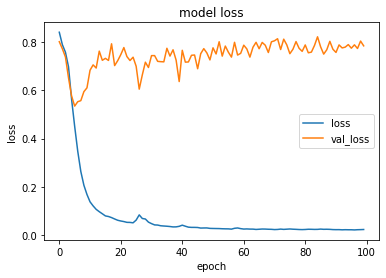

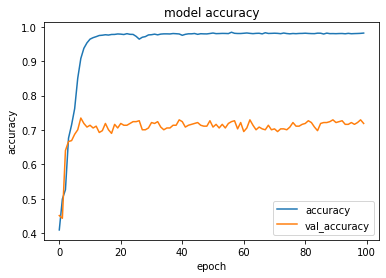

In [190]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()


# **Evaluation**

In [191]:
#accuracy calculation
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=512)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=512)
print("The test accuracy is: "+str(loss_and_metrics[1]))

15/15 [==============================] - 3s 199ms/step - loss: 0.0204 - accuracy: 0.9833
The train accuracy is: 0.9833041429519653
3/3 [==============================] - 1s 198ms/step - loss: 0.9902 - accuracy: 0.6684
The test accuracy is: 0.6684175729751587


In [192]:
predictions = model.predict(testing_padded)

In [193]:
predictions = np.argmax(predictions, axis=-1) 

In [194]:
test_labels=np.argmax(test_labels, axis=-1)

In [195]:
precision, recall, fscore, _ = precision_recall_fscore_support(test_labels,predictions, average='weighted')
print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))

Precision :0.6735624363703093
Recall :0.6684175968483257
fscore :0.6687127736246048


# **Confusion Matrix & Classification Report**

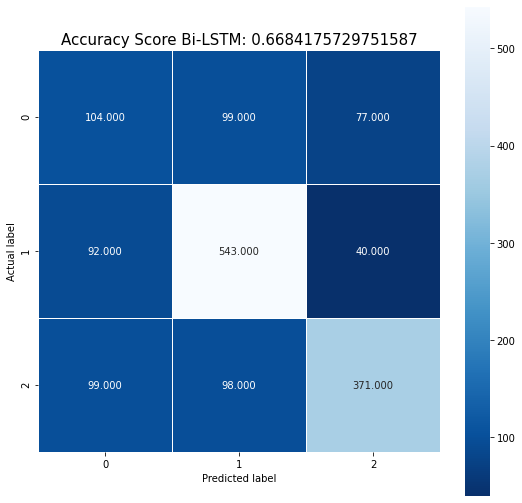

In [196]:
cm = metrics.confusion_matrix(test_labels,predictions)
#print(cm)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Bi-LSTM: {0}'.format(loss_and_metrics[1])
plt.title(all_sample_title, size = 15);


In [197]:
report = pd.DataFrame(classification_report(y_true = test_labels, y_pred = predictions, output_dict=True)).transpose()
report = report.rename(index={'0': 'Negative','1':'nutral','2':'positive'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
display(report)

,precision,recall,f1-score,support
Negative,35.25,37.14,36.17,280.000000
nutral,73.38,80.44,76.75,675.000000
positive,76.02,65.32,70.27,568.000000
accuracy,66.84,66.84,66.84,0.668418
macro avg,61.55,60.97,61.06,1523.000000
weighted avg,67.36,66.84,66.87,1523.000000
